# Доверительные интервалы (контрольная работа)

In [1]:
import numpy as np
import pandas as pd

from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

В файле `cr.csv` лежат результаты контрольной работы, которая проводилась в Вышке на факультете "Э".  По мнению студентов эти оценки смещённые, несостоятельные и ужасно неэффективные. Но это уже совершенно другая история. Подгрузим файлик и посмотрим на него!

__Описание колонок:__


* `contest_login` - уникальный идентификатор студента
* `fraud` - в списывании скольки задач был уличён студент 
* `k1` - результат за первую контрольную, `k1a - k1f` в разбивке по задачам
* `k2` - результат за вторую контрольную, `k2a - k2f` в разбивке по задачам
* `k3` - результат за третью контрольную, `k3a - k3с` в разбивке по задачам

In [2]:
df = pd.read_csv('data\cr.csv', sep='\t')
print(df.shape)
df.head()

(389, 20)


,contest_login,fraud,k1a,k1b,k1c,k1d,k1e,k1f,k1,k2a,k2b,k2c,k2d,k2e,k2f,k2,k3a,k3b,k3c,k3
0,eds_python_2020_1,0.0,10.0,10.0,20.0,30.0,4.0,22.0,10.1,20.0,10.0,20.0,20.0,20.0,20.0,11.0,35.0,0.0,27.0,6.2
1,eds_python_2020_2,1.0,9.0,10.0,20.0,NaN,16.0,12.0,6.7,NaN,5.0,NaN,20.0,20.0,20.0,6.5,35.0,29.0,22.0,8.6
2,eds_python_2020_3,0.0,2.0,10.0,20.0,NaN,20.0,30.0,8.2,20.0,5.0,NaN,20.0,20.0,20.0,8.5,28.0,2.0,0.0,3.0
3,eds_python_2020_4,1.0,10.0,10.0,20.0,NaN,16.0,14.0,7.0,20.0,10.0,NaN,20.0,20.0,20.0,9.0,30.0,38.0,0.0,6.8
4,eds_python_2020_5,2.0,10.0,10.0,12.0,0.0,16.0,22.0,7.0,20.0,10.0,NaN,20.0,20.0,20.0,9.0,0.0,0.0,0.0,0.0


In [3]:
df.isnull().sum().reset_index().T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
index,contest_login,fraud,k1a,k1b,k1c,k1d,k1e,k1f,k1,k2a,k2b,k2c,k2d,k2e,k2f,k2,k3a,k3b,k3c,k3
0,0,30,87,56,58,217,154,116,0,249,191,305,98,123,205,0,15,17,18,1


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fraud,359.0,1.952646,9.903472,0.0,0.00,1.0,2.00,187.0
k1a,302.0,7.625828,3.900217,0.0,6.25,10.0,10.00,10.0
k1b,333.0,9.369369,2.296912,0.0,10.00,10.0,10.00,10.0
k1c,331.0,15.362538,6.096322,0.0,12.00,18.0,20.00,20.0
k1d,172.0,20.889535,12.848852,0.0,8.00,30.0,30.00,30.0
k1e,235.0,11.472340,7.239071,0.0,4.00,16.0,18.00,20.0
k1f,273.0,15.641026,8.810259,0.0,12.00,12.0,22.00,30.0
k1,389.0,5.447815,3.163390,0.0,3.40,5.3,7.40,13.0
k2a,140.0,16.442857,7.538173,0.0,20.00,20.0,20.00,20.0
k2b,198.0,5.686869,4.256131,0.0,0.00,5.0,10.00,15.0


__а) Распределение результатов контрольной__ 

- Запишите все оценки за первую контрольную в переменную `x`, все пропуски удалите
- Найдите среднее и стандартное отклонение (используйте несмещённую оценку) 
- Постройте гистограмму результатов за первую контрольную 
- На этой же картинке постройте плотность нормального распределения со средним и стандартным отклонением, посчитанными выше

Похоже ли эмпирическое распределение на нормальное?

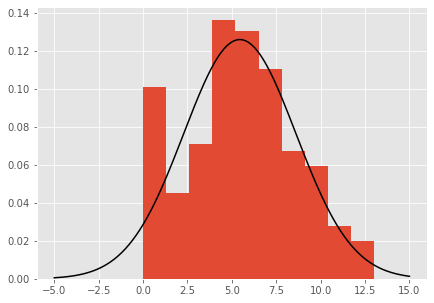

In [5]:
# your code here
x = df['k1'].dropna(axis=0).values

x_mean = np.mean(x)
x_std = np.std(x, ddof=1)

plt.figure(figsize=(7, 5))
df.k1.hist(bins=10, density=True);

xs = np.linspace(-5, 15, 300)
ys = stats.norm(loc=x_mean, scale=x_std).pdf(xs)
plt.plot(xs, ys, color="black");

По аналогии с тем, как это было сделано на лекции, проверьте с помощью теста Колмогорова-Смирнова гипотезу о нормальности: 

- Используйте функцию `kstest` из пакета `scipy`
- С помощью `.pvalue` вытащите из результатов теста p-значение, запишите его в переменную `pvalue`
- По аналогии запишите в `K` значение статистики Колмогорова
- Если p-значение оказалось больше $0.05$, гипотеза о нормальности данных не отвергается, и мы можем дальше использовать эту предпосылку

In [6]:
# your code here
pvalue = stats.kstest(x, 'norm', args=(x_mean, x_std))[1]
K = stats.kstest(x, 'norm', args=(x_mean, x_std))[0]
print(f'P-value: {pvalue:.3} > 0.05 ==> гипотеза о нормальности распределения оценок за 1-ю контрольную не отвергается')

P-value: 0.25 > 0.05 ==> гипотеза о нормальности распределения оценок за 1-ю контрольную не отвергается


Предположим невероятное! А именно, независимость и одинаковую распределённость наших наблюдений (никто не списывал контрольную друг у друга).

__б) Интервал для среднего.__ 

Постройте точный $95\%$-й доверительный интервал для ожидамоего результата за первую контрольную. В качестве оценки стандартного отклонения используйте несмещённый вариант, `ddof=1`. В переменные `left` и `right` запишите границы получившегося интервала. В переменную `delta` его ширину.

In [7]:
# your code here
n = x.size
mu_hat = df.k1.mean()
sd_hat = df.k1.std(ddof=1) / np.sqrt(n)

left, right = stats.t.interval(0.95, df=(n-1), loc=mu_hat, scale=sd_hat)
delta = right - left

print(f"Доверительный интервал [{left:.5}; {right:.5}] ширины {delta:.4}")

Доверительный интервал [5.1325; 5.7632] ширины 0.6307


__в) Ангелы и демоны__

Переменная`fraud` - в списывании скольки задач был уличён студент. Разобьём наши наблюдения на две группы: Ангелы и Демоны. У Ангелов `fraud == 0`, у Демонов `fraud > 0`. 

Запишите оценки за первую контрольную для ангелов в переменную `angels`, для демонов в `demons`. Все пропуски из выборки удалите. Постройте на общем фоне гистограмму распределения оценок за первую контрольную у Ангелов и Демонов. 

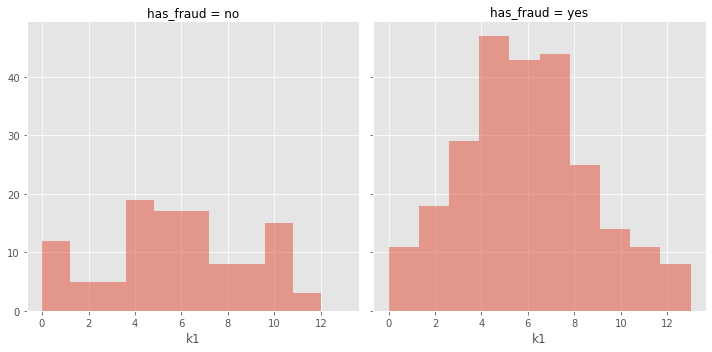

In [8]:
# your code here
fraud_df = df[df.fraud.isnull() == False]
fraud_df['has_fraud'] = fraud_df.fraud.apply(lambda x: 'no' if x == 0 else 'yes')
angels = fraud_df.query('has_fraud == "no"')['k1'].values.tolist()
demons = fraud_df.query('has_fraud == "yes"')['k1'].values.tolist()

g = sns.FacetGrid(fraud_df, col='has_fraud', height=5, aspect=1)
g.map(plt.hist, 'k1', alpha=0.5);

__г) Интервал для разницы средних__ 

Постройте примерный $95\%$-й доверительный интервал для разницы ожидаемого результата за первую контрольную у Ангелов и Демонов без предположения о равенстве дисперсий (интервал Уэлча). Для оценки всех дисперсий используйте несмещённый вариант.

In [9]:
# your code here
x = df[df.fraud == 0.0].k1.values
y = df[df.fraud > 0.0].k1.values

diff = x.mean() - y.mean()

nx, ny = x.size, y.size

diff_sd = np.sqrt(x.var(ddof=1) / nx + y.var(ddof=1) / ny)

u = (x.var(ddof=1) / nx + y.var(ddof=1) / ny) ** 2
d = (x.var(ddof=1)**2) / (nx**2 * (nx - 1)) + (y.var(ddof=1)**2) / (ny**2* (ny - 1))
nu =  u/d 

left, right = stats.t.interval(0.95, df=nu, loc=diff, scale=diff_sd)
delta = right - left

print(f"Число степеней свободы: {int(nu)}")
print(f"Доверительный интервал [{left:.4}; {right:.4}] ширины {right:.4}")

Число степеней свободы: 191
Доверительный интервал [-0.8046; 0.547] ширины 0.547


__д) Интервал для дисперсии__ 

Предположим, что математическое ожидание результата за контрольную зависит от уровня подготовки, а дисперсия результата — от нервов. Постройте для отношения нервозности Демонов и Ангелов $95\%$ доверительный интервал. Для оценки всех дисперсий используйте несмещённый вариант.

In [10]:
# your code here
alpha = 0.05

n, m = x.size - 1, y.size - 1
sn, sm = x.var(ddof=1), y.var(ddof=1)

left = sm / sn * stats.f(n, m).ppf(alpha/2)
right = sm / sn * stats.f(n, m).ppf(1 - alpha/2)
delta = right - left

print(f"Доверительный интервал [{left:.5}; {right:.5}] ширины {delta:.5}")

Доверительный интервал [0.61204; 1.1624] ширины 0.55034


__е) Ангелы и демоны решают задачки__ 

Нарисуйте картинку для корреляционной матрицы по задачам первой контрольной для всех наблюдений, отдельно для Ангелов и Демонов. Пропуски заполните нулями. Будем считать, что если у студента нет оценки, он не выполнял это задание. Для подсчёта корреляций используйте метод `.corr`. Для отрисовки матриц функцию `heatmap` из пакета `seaborn`. Для ангелов неплохо подойдёт цветовая схема `YlGnBu`. Для демонов подходит схема `gist_heat_r`.

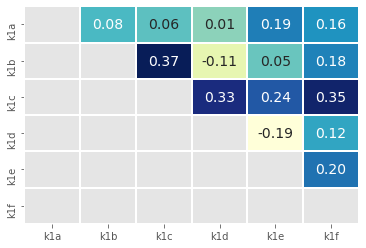

In [11]:
tasks = [i for i in df.columns if i.startswith('k1') and i != 'k1']

# your code here
angels_matrix = df[df.fraud == 0][tasks].corr()
angels_mtx = angels_matrix.where(np.triu(np.ones(angels_matrix.shape), k=1).astype(np.bool))
sns.heatmap(angels_mtx, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=1, annot_kws={'size': 14}, cbar=False);

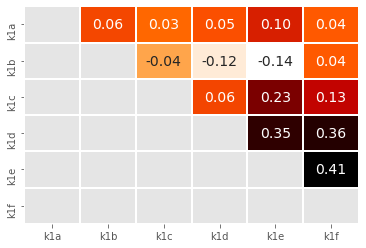

In [12]:
# your code here
demons_matrix = df[df.fraud != 0][tasks].corr()
demons_mtx = demons_matrix.where(np.triu(np.ones(demons_matrix.shape), k=1).astype(np.bool))
sns.heatmap(demons_mtx, cmap='gist_heat_r', annot=True, fmt='.2f', linewidths=1, annot_kws={'size': 14}, cbar=False);

Между баллом за какие задачи самая высокая корреляция у Ангелов? В грейдер отправьте название колонок в порядке возрастания через запятую. __Например:__ `("k1a", "k1f")`. 

In [13]:
# your code here
names_angels = ("k1b", "k1c")
names_demons = ("k1e", "k1f")

__ё) Доля написавших третью контрольную.__

Без буквы `ё` никуда, скажут нам [Пафнутий Чебышёв](https://ru.wikipedia.org/wiki/%D0%A7%D0%B5%D0%B1%D1%8B%D1%88%D1%91%D0%B2,_%D0%9F%D0%B0%D1%84%D0%BD%D1%83%D1%82%D0%B8%D0%B9_%D0%9B%D1%8C%D0%B2%D0%BE%D0%B2%D0%B8%D1%87) и [Лёв Толстой](https://arzamas.academy/special/ruslit/writers/tolstoy).  

У студентов был выбор: писать или не писать третью контрольную. Если в колонке `k3` стоит $0$, значит студент не стал это делать. Постройте асимптотический $95\%$-й доверительный интервал для разницы долей Ангелов и Демонов, которые решили писать третью контрольную. 

__Примечание:__ На практике, если мы пользуемся асимптотическими доверительными интервалами, мы можем искать границы двумя способами:

* __Первый__ состоит в том, что мы оцениваем стандартное отклонение с помощью $\sqrt{\hat{p} \cdot (1 - \hat{p})} = \sqrt{\frac{1}{n} \cdot \sum_{i=1}^n (x_i - \bar{x})^2}$. 
* __Второй способ__ состоит в том, чтобы оценить стандартное отклонение как  $\sqrt{\frac{1}{n-1} \cdot \sum_{i=1}^n (x_i - \bar{x})^2}$. 

В плане асимптотики это не влияет на выводы, так как обе этих оценки состоятельно оценивают дисперсию. Можно пользоваться любым. Однако, чтобы с грейдером не было проблем и задание зачлось, воспользуйтесь первым способом. 

In [14]:
a = df[df.fraud == 0]
a['k3_bool'] = np.where(a.k3 == 0, 0, 1)

d = df[df.fraud > 0]
d['k3_bool'] = np.where(d.k3 == 0, 0, 1)

n1, n2 = a.k3_bool.size, d.k3_bool.size
m1, m2 = a.k3_bool.sum(), d.k3_bool.sum()

p1, p2 = a.k3_bool.mean(), d.k3_bool.mean()

p1_hat = p1 * (1 - p1)
p2_hat = p2 * (1 - p2)

diff = p1 - p2
diff_std = np.sqrt(p1_hat/n1 + p2_hat/n2)

left, right = stats.norm.interval(0.95, loc=diff, scale=diff_std)
delta = right - left

print(f"Доверительный интервал [{left:.4}; {right:.4}] ширины {delta:.4}")

Доверительный интервал [-0.1885; 0.03341] ширины 0.2219


__ж) Снова разница средних__ 

Посмотрим на результаты студентов в динамике. Постройте точный $95\%$ доверительный интервал для средней разницы оценок за вторую и первую контрольные. Пропуски в данных заполните нулями. 

In [15]:
# your code here
x = df.k2.fillna(0).values
y = df.k1.fillna(0).values

n = x.size
mu_hat = (x - y).mean()
sd_hat = (x - y).std(ddof=1) / np.sqrt(n)

left, right = stats.t.interval(0.95, df=(n - 1), loc=mu_hat, scale=sd_hat)
delta = right - left

print(f"Доверительный интервал [{left:.5}; {right:.5}] ширины {delta:.4}")

Доверительный интервал [-1.4563; -0.70721] ширины 0.7491


<br>